# Hyperboloid valued data, i.e. $\mathbb{H}_d$, on line- and grid-graph, i.e. $\mathbb{H}_d$-signal and images

### here, a generailzation for any dimension $d$ and visulizations for $d \in \{1,2\}$
### arXiv: [Denoising of Sphere- and SO(3)-Valued Data by Relaxed Tikhonov Regularization](https://arxiv.org/abs/2307.10980)

In [1150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy import interpolate

import imp
import relaxed_tikhonov_sphere
import relaxed_tikhonov_sphere_image

In [1151]:
imp.reload(relaxed_tikhonov_sphere)
imp.reload(relaxed_tikhonov_sphere_image)

<module 'relaxed_tikhonov_sphere_image' from '/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py'>

In [889]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal(1,20)

minkowsky inner-prod test :  1.926804773503633e-14


In [859]:
data_smooth_signal = relaxed_tikhonov_sphere.sample_smooth_hyperbolic_signal_h(1,20)

minkowsky inner-prod test :  1.8104466468784172e-14


In [860]:
data_smooth_image = relaxed_tikhonov_sphere_image.sample_smooth_hyperbolic_image(1,11)

minkowsky inner-prod test :  3.662793852714154e-14


In [861]:
sig = 0.6
noise_smooth_signal = data_smooth_signal + sig*np.random.randn(2,np.shape(data_smooth_signal)[1])
noise_smooth_image = data_smooth_image + sig*np.random.randn(2,np.shape(data_smooth_image)[1],np.shape(data_smooth_image)[1])

### Main algorithm

- ADMM_red_hyper : solving the proposed simplified and generalized convex optimization problem in ...

In [1044]:
sol_x, sol_v, sol_f, sol_l= relaxed_tikhonov_sphere.ADMM_red_hyper(noise_smooth_signal, data_smooth_signal, 5, 0.1, 10001)

iteration 	| func-value 	| mikwosky-error 	| error
--------------------------------------------------------------------------
0 		|  -2.09e+07 	|   1.44e+02 		|   9.54e+01
100 		|   3.06e+04 	|   5.47e+00 		|   5.81e-02
200 		|   3.35e+04 	|   2.60e+00 		|   2.71e-02
300 		|   3.41e+04 	|   1.45e+00 		|   1.45e-02
400 		|   3.41e+04 	|   8.34e-01 		|   8.56e-03
500 		|   3.41e+04 	|   4.67e-01 		|   5.25e-03
600 		|   3.40e+04 	|   2.44e-01 		|   3.22e-03
700 		|   3.39e+04 	|   1.13e-01 		|   1.91e-03
800 		|   3.38e+04 	|   3.93e-02 		|   1.08e-03
900 		|   3.37e+04 	|   5.09e-03 		|   5.68e-04
1000 		|   3.37e+04 	|   1.41e-02 		|   2.75e-04
1100 		|   3.37e+04 	|   1.78e-02 		|   1.19e-04


In [1045]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_signal)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_signal - data_smooth_signal)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.13125357306223046 	| MSE(Noise, Data) =  0.7869949219244983


In [1047]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(noise_smooth_image, data_smooth_image, 3, 0.1, 1001)

iteration 	| func-value 	| mikwosky-error 	| error
-------------------------------------------------------------------------
0 		|  -4.64e+09 	|   1.30e+02 		|   1.54e+02
100 		|   4.85e+06 	|   6.90e-01 		|   9.30e-02
200 		|   5.13e+06 	|   1.38e-01 		|   1.75e-02
300 		|   5.19e+06 	|   3.67e-02 		|   4.47e-03
400 		|   5.20e+06 	|   1.08e-02 		|   1.29e-03
500 		|   5.21e+06 	|   3.30e-03 		|   3.97e-04
600 		|   5.21e+06 	|   1.03e-03 		|   1.26e-04


In [1048]:
print('MSE(Solution, Data) = ', np.linalg.norm(sol_x - data_smooth_image)**2/np.size(sol_x[0,:]), '\t|','MSE(Noise, Data) = ', np.linalg.norm(noise_smooth_image - data_smooth_image)**2/np.size(sol_x[0,:]))

MSE(Solution, Data) =  0.059566794497667185 	| MSE(Noise, Data) =  0.7177323920623895


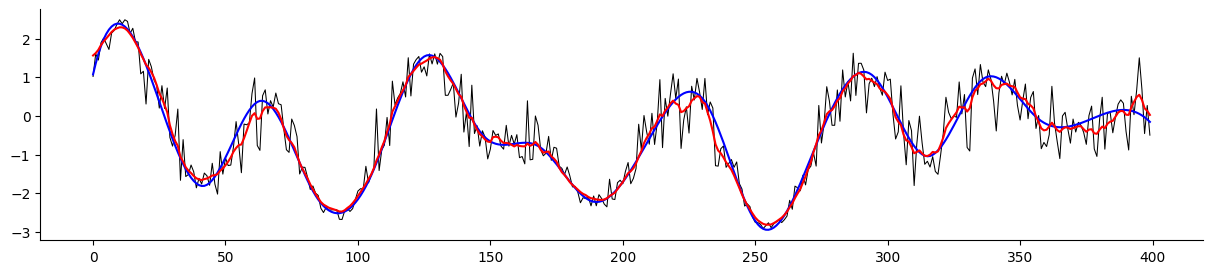

In [1046]:
relaxed_tikhonov_sphere.plot_hyper1(noise_smooth_signal, data_smooth_signal, sol_x)

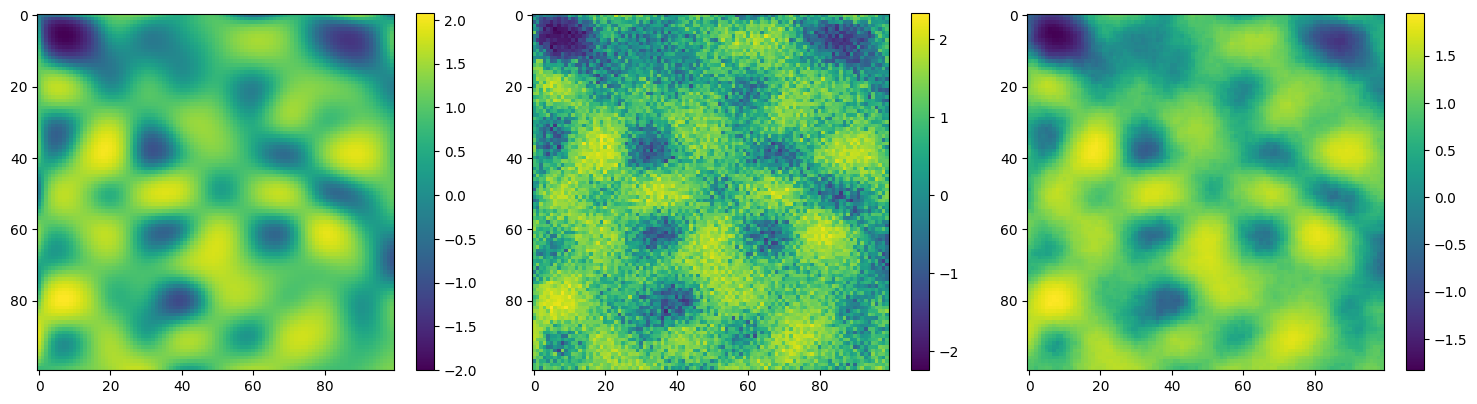

In [1049]:
relaxed_tikhonov_sphere_image.plot_hyper1(noise_smooth_image,data_smooth_image,sol_x)

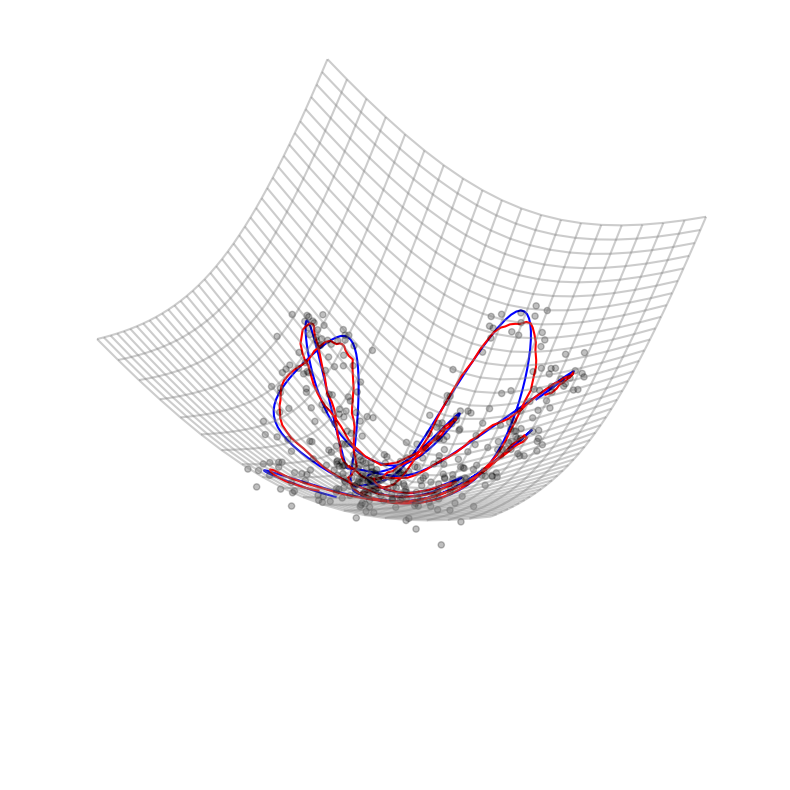

In [1034]:
relaxed_tikhonov_sphere.plot_hyper2(noise_smooth_signal,data_smooth_signal,sol_x)

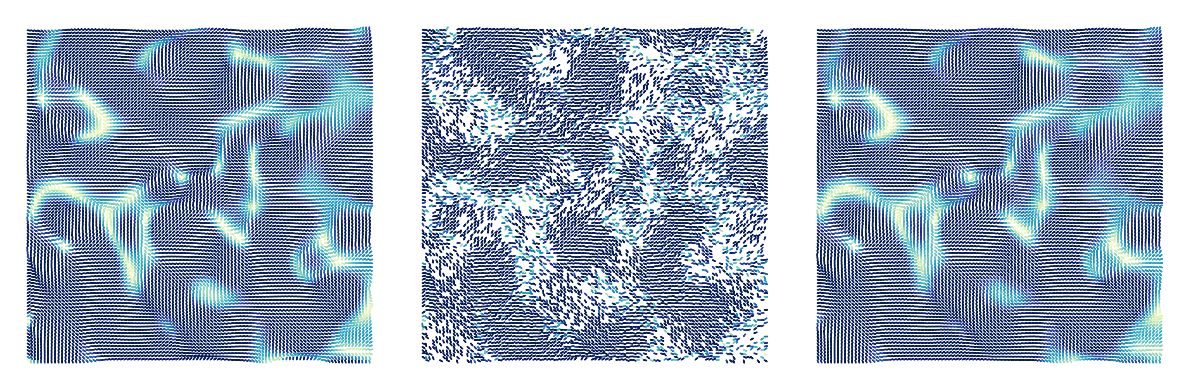

In [1020]:
relaxed_tikhonov_sphere_image.plot_hyper2(noise_smooth_image, data_smooth_image, sol_x)

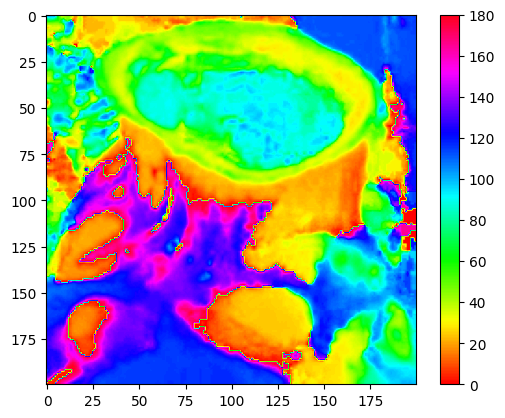

In [1084]:
from matplotlib import image
from PIL import Image
import cv2
from scipy import interpolate
from scipy.interpolate import CubicSpline
from matplotlib import cm

img = cv2.imread('orig_corals.jpg')

imgsmall = cv2.resize(img.copy(), (200,200), interpolation =cv2.INTER_AREA)

imgconv = cv2.cvtColor(imgsmall.copy(), cv2.COLOR_BGR2HLS)

imgsmallconv = cv2.cvtColor(imgsmall.copy(), cv2.COLOR_BGR2RGB)

im = plt.imshow(imgconv[:,:,0], cmap=cm.hsv, vmin=0, vmax=180)
plt.colorbar(im)

In [1085]:
# one cone
transimgconv = np.zeros((3,np.shape(imgconv)[0],np.shape(imgconv)[0]))
transimgconv[0,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.cos(imgconv[:,:,0].copy()/180*2*np.pi)
transimgconv[1,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.sin(imgconv[:,:,0].copy()/180*2*np.pi)
transimgconv[2,:,:] = imgconv[:,:,1].copy()/256

In [810]:
# two cone
transimgconv1 = np.zeros((3,np.shape(imgconv)[0],np.shape(imgconv)[0]))
transimgconv2 = np.zeros((3,np.shape(imgconv)[0],np.shape(imgconv)[0]))

#transimgconv[0,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.cos(imgconv[:,:,0].copy()/180*2*np.pi)
#transimgconv[1,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.sin(imgconv[:,:,0].copy()/180*2*np.pi)
transimgconv[2,:,:] = np.minimum(imgconv[:,:,1].copy()/256,0.5)*2
transimgconv[2,:,:] = np.where(transimgconv[2,:,:] == 1.0, -(np.maximum(imgconv[:,:,1].copy()/256,0.5) - 0.5)*2, transimgconv[2,:,:])
transimgconv[0,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.cos(imgconv[:,:,0].copy()/180*2*np.pi)
transimgconv[1,:,:] = imgconv[:,:,2].copy()/256*imgconv[:,:,1].copy()/256*np.sin(imgconv[:,:,0].copy()/180*2*np.pi)

In [1086]:
normimgconv = (transimgconv[0,:,:])**2 + (transimgconv[1,:,:])**2 - (transimgconv[2,:,:])**2

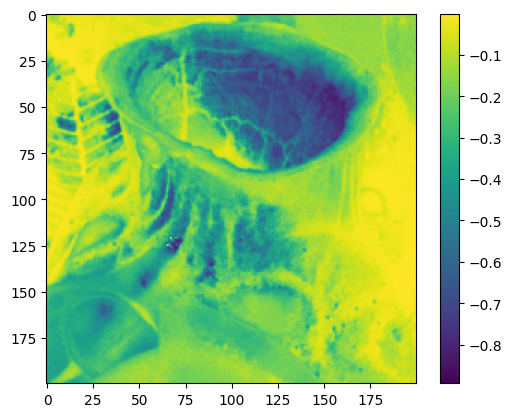

In [1087]:
plt.imshow(normimgconv)
plt.colorbar()

In [1088]:
nnormimgconv = np.where(normimgconv>0, -normimgconv, normimgconv)

In [1089]:
np.max(nnormimgconv)

-0.0007079669740051031

In [1090]:
# proj one cone
hyperimgconv = np.zeros((3,np.shape(imgconv)[0],np.shape(imgconv)[0]))
hyperimgconv[0,:,:] = transimgconv[0,:,:]/np.sqrt(-nnormimgconv)
hyperimgconv[1,:,:] = transimgconv[1,:,:]/np.sqrt(-nnormimgconv)
hyperimgconv[2,:,:] = transimgconv[2,:,:]/np.sqrt(-nnormimgconv)

In [821]:
# proj two cone
hyperimgconv = np.zeros((3,np.shape(imgconv)[0],np.shape(imgconv)[0]))
hyperimgconv[0,:,:] = transimgconv[0,:,:]/np.sqrt(np.where(nnormimgconv < 0, -nnormimgconv, nnormimgconv))
hyperimgconv[1,:,:] = transimgconv[1,:,:]/np.sqrt(np.where(nnormimgconv < 0, -nnormimgconv, nnormimgconv))
hyperimgconv[2,:,:] = transimgconv[2,:,:]/np.sqrt(np.where(nnormimgconv < 0, -nnormimgconv, nnormimgconv))

In [1091]:
minknormdata = (hyperimgconv[0,:,:])**2 + (hyperimgconv[1,:,:])**2 - (hyperimgconv[2,:,:])**2

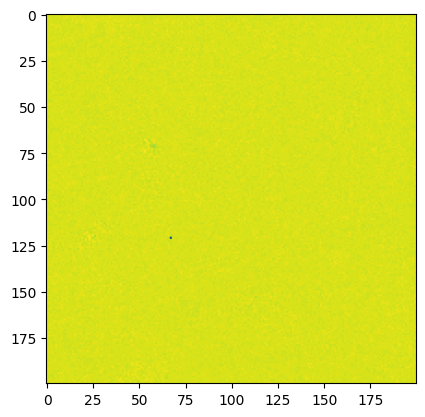

In [1092]:
plt.imshow(minknormdata)

In [1093]:
np.max(minknormdata), np.min(minknormdata)

(-0.9999999999999991, -1.0000000000000142)

In [1094]:
hyperimgconv_noise = relaxed_tikhonov_sphere_image.TangtialHyperNoise(hyperimgconv,0.1)

3.834723827137791e-14
6.136902758715666e-14


In [1095]:
sol_x, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_red_hyper2D(hyperimgconv_noise, hyperimgconv, 0.6, 0.1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|  -3.47e+09 	|   1.21e+02 		|   1.39e+02
100 		|   3.39e+06 	|   2.83e-02 		|   6.57e-03
200 		|   3.42e+06 	|   4.54e-03 		|   3.94e-04


In [1154]:
sol_x_tv, sol_v, sol_f1, sol_l1, sol_f2, sol_l2 = relaxed_tikhonov_sphere_image.ADMM_TV_red_hyper2D(hyperimgconv_noise, hyperimgconv, 0.1, 1, 1001)

iteration 	| func-value 	| minkowsky-error 	| error
-------------------------------------------------------------------------
0 		|   2.16e+04 	|   4.98e-03 		|   1.38e+01
100 		|   8.43e+02 	|   5.27e-06 		|   2.09e-01
200 		|   7.55e+02 	|   1.34e-06 		|   3.99e-02
300 		|   7.30e+02 	|   7.27e-07 		|   1.99e-02
400 		|   7.17e+02 	|   4.81e-07 		|   1.25e-02
500 		|   7.08e+02 	|   3.62e-07 		|   8.89e-03
600 		|   7.01e+02 	|   3.25e-07 		|   6.85e-03
700 		|   6.96e+02 	|   2.69e-07 		|   5.58e-03
800 		|   6.91e+02 	|   2.85e-07 		|   4.72e-03
900 		|   6.87e+02 	|   1.92e-07 		|   4.13e-03
1000 		|   6.84e+02 	|   1.94e-07 		|   3.73e-03
1000 		|   6.84e+02 	|   7.75e-03 		|   3.73e-03


In [1157]:
np.max(np.abs(np.sum(sol_x_tv[0:2,:,:]**2,0) - sol_x_tv[2,:,:]**2+1))

0.001428129851719362

In [1158]:
print('MSE(Noise,Data) = ', np.linalg.norm(hyperimgconv_noise - hyperimgconv), '\t|', 'MSE(Sol, Data) = ', np.linalg.norm(sol_x_tv - hyperimgconv))

MSE(Noise,Data) =  28.242430224155413 	| MSE(Sol, Data) =  14.785205717462306


/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:2292: RuntimeWarning: invalid value encountered in divide
  aData = np.arcsin(Data[0,:,:]/np.sinh(rData))
/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:2292: RuntimeWarning: invalid value encountered in arcsin
  aData = np.arcsin(Data[0,:,:]/np.sinh(rData))


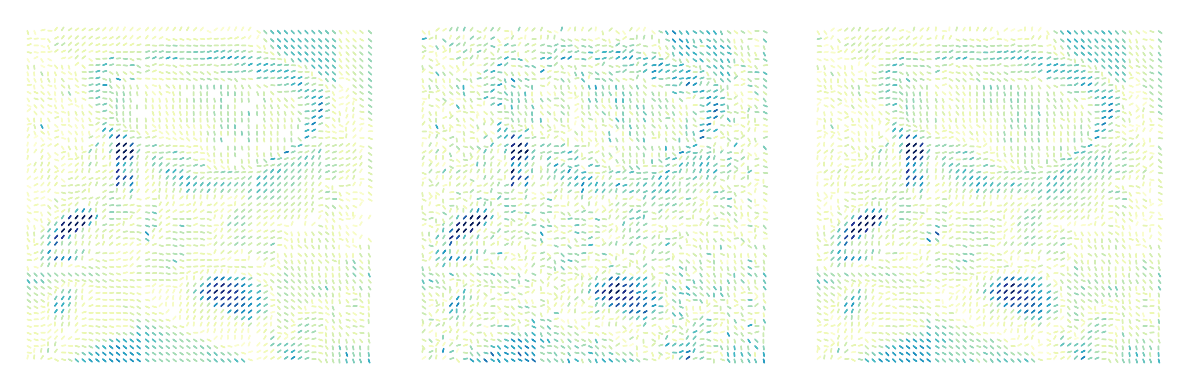

In [1100]:
relaxed_tikhonov_sphere_image.plot_hyper2_sep(np.rot90(hyperimgconv_noise,k=3,axes=(1,2)), np.rot90(hyperimgconv,k=3,axes=(1,2)), np.rot90(sol_x,k=3,axes=(1,2)))

/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:2296: RuntimeWarning: invalid value encountered in divide
  aData = np.arcsin(Data[0,:,:]/np.sinh(rData))
/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:2296: RuntimeWarning: invalid value encountered in arcsin
  aData = np.arcsin(Data[0,:,:]/np.sinh(rData))
/Users/jonasbresch/Desktop/cycle valued data/python/finale/github/relaxed_tikhonov_sphere_image.py:2297: RuntimeWarning: invalid value encountered in arcsin
  asol_x = np.arcsin(sol_x[0,:,:]/np.sinh(rsol_x))


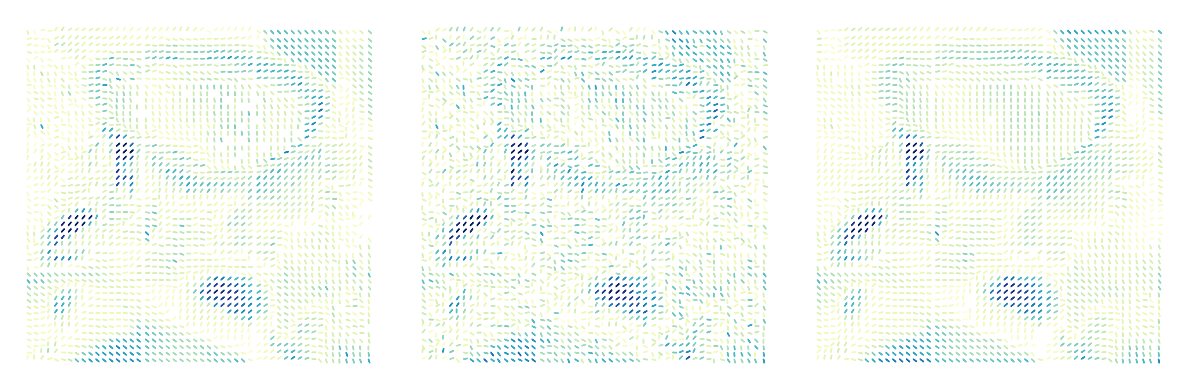

In [1159]:
relaxed_tikhonov_sphere_image.plot_hyper2_sep(np.rot90(hyperimgconv_noise,k=3,axes=(1,2)), np.rot90(hyperimgconv,k=3,axes=(1,2)), np.rot90(sol_x_tv,k=3,axes=(1,2)))